In [91]:
from numpy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline  

#class for orbits
class Orbit():
    #class for the orbit of one planet
    ##load inputs for planet 1 --- all angles in degrees
    mratio = 0.#mass ratio m/mc
    m = 0. # mass of planet
    mc = 0. # mass of star
    a = 0. #AU
    n = 0. #deg/y mean motion
    e =  0. #eccentricity
    pom =0. # pomega = Omega+omega
    I = 0.
    Om =0. # big Omega
    def function(self):
        print("This is a message inside the class.")
#functions for laplace coefficients
def funcb32_2(psi,alpha):
    return cos(2.*psi)/(1.-2.*alpha*cos(psi)+alpha*alpha)**(3./2.)
def funcb32_1(psi,alpha):
    return cos(psi)/(1.-2.*alpha*cos(psi)+alpha*alpha)**(3./2.)
def getb32_1(alpha):
    b = 1./pi*quad(funcb32_1,0.,2.*pi,args=(alpha))[0]
    return b
def getb32_2(alpha):
    b = 1./pi*quad(funcb32_2,0.,2.*pi,args=(alpha))[0]
    return b
#determine the scaling by the boundary conditions
def geth(e,po):
    po=radians(po)
    return e*sin(po)
def getk(e,po):
    po=radians(po)
    return e*cos(po)
def getp(I,Om):
    I = radians(I)
    Om=radians(Om)
    return I*sin(Om)
def getq(I,Om):
    I = radians(I)
    Om=radians(Om)
    return I*cos(Om)

In [106]:
#Set up the planets
def get_n(a,mstar):
    period = sqrt(1./mstar * (a)**3.)#units of year
    n = 360./period # return the mean motion in degrees / year
    return n
#RIVER ICS
#SET UP GJ876
#set up the orbit class for Jupiter
me = 3.003467e-6
mj = 317.828*me
mstar=.334

GlockC = Orbit()
GlockC.mratio = mj*0.7142/mstar #mass ratio m1/mc
GlockC.mc = mstar
GlockC.m = mj*0.7142
GlockC.a = 0.1296 #AU
GlockC.n = get_n(GlockC.a,mstar) #deg/y
GlockC.e = 0.256
GlockC.pom = 48.76
GlockC.I = 53.06
GlockC.Om =0.01#48.76

GlockB=Orbit()
GlockB.mratio = mj*2.2756/mstar
GlockB.m = mj*2.2756
GlockB.mc = mstar
GlockB.a = 0.208317
GlockB.n = get_n(GlockB.a,mstar)
GlockB.e = 0.0324
GlockB.pom = 50.3
GlockB.I = 53.06
GlockB.Om = 0.01


GlockE = Orbit()
GlockE.mratio = me*14.6/mstar
GlockE.m = me*14.6
GlockE.mc = mstar
GlockE.a = 0.3343
GlockE.n = get_n(GlockE.a,mstar)
GlockE.e = 0.055
GlockE.pom = 239
GlockE.I = 53.06
GlockE.Om = 0.01

GlockNull = Orbit()
GlockNull.mratio = 0.#me*14.6/mstar
GlockNull.m = 0.#me*14.6
GlockNull.mc = mstar
GlockNull.a = 0.00001#0.3343
GlockNull.n = 0.00001#get_n(GlockE.a,mstar)
GlockNull.e = 0.00001#0.055
GlockNull.pom =0.00001# 239
GlockNull.I = 0.00001#53.06
GlockNull.Om = 0.00001#0.01

#set up the orbit class for Jupiter
Jupiter = Orbit()
Jupiter.mratio = 9.54786e-4 #mass ratio m1/mc
Jupiter.m = 9.54786e-4
Jupiter.mc = 1.0
Jupiter.a = 5.202545 #AU
Jupiter.n = 30.3374 #deg/y
Jupiter.e = .0474622 
Jupiter.pom = 13.983865 
Jupiter.I = 1.30667
Jupiter.Om =100.0381

Saturn = Orbit

##load inputs for planet 2 --- all angles in degrees
Saturn.mratio = 2.85837e-4 #mass ratio m2/mc
Saturn.m = 2.85837e-4
Saturn.mc=1.0
Saturn.a = 9.554841 #AU
Saturn.n = 12.1890 #deg/y
Saturn.e = .0575481 
Saturn.pom = 88.719425 
Saturn.I = 2.48795
Saturn.Om =113.1334



In [101]:
#generalized matrix coeficcients for N~3 bodies
#inputs must be exact
def get_ajj(Pj,Pk1,Pk2):
    #pass the object classes  for the three planets in question where
    # k1 and k2 are the indices for k/= j 
    # e.g. if j =1  - > k1 = 2 and k2 = 3 etc
    
    #equations 7.128 and 7.129
    if(Pj.a >Pk1.a):
        alphajk1 = Pk1.a/Pj.a
        alphajk1B = 1.
    else:
        alphajk1 = Pj.a/Pk1.a
        alphajk1B = Pj.a/Pk1.a
    
    if(Pj.a >Pk2.a):
        alphajk2 = Pk2.a/Pj.a
        alphajk2B = 1.
    else:
        alphajk2 = Pj.a/Pk2.a
        alphajk2B = Pj.a/Pk2.a
    
    return Pj.n/4.*(Pk1.m/(Pj.mc+Pj.m)*alphajk1*alphajk1B*getb32_1(alphajk1)+\
            Pk2.m/(Pj.mc+Pj.m)*alphajk2*alphajk2B*getb32_1(alphajk2))


def get_bjj(Pj,Pk1,Pk2):
    #pass the object classes  for the three planets in question where
    # k1 and k2 are the indices for k/= j 
    # e.g. if j =1  - > k1 = 2 and k2 = 3 etc
    
    #equations 7.128 and 7.129
    if(Pj.a >Pk1.a):
        alphajk1 = Pk1.a/Pj.a
        alphajk1B = 1.
    else:
        alphajk1 = Pj.a/Pk1.a
        alphajk1B = Pj.a/Pk1.a
    
    if(Pj.a >Pk2.a):
        alphajk2 = Pk2.a/Pj.a
        alphajk2B = 1.
    else:
        alphajk2 = Pj.a/Pk2.a
        alphajk2B = Pj.a/Pk2.a
    
    return -1.*Pj.n/4.*(Pk1.m/(Pj.mc+Pj.m)*alphajk1*alphajk1B*getb32_1(alphajk1)+\
            Pk2.m/(Pj.mc+Pj.m)*alphajk2*alphajk2B*getb32_1(alphajk2))

def get_ajk(Pj,Pk):
    #pass the object classes  for the three planets in question where
    # k1 and k2 are the indices for k/= j 
    # e.g. if j =1  - > k1 = 2 and k2 = 3 etc
    
    #equations 7.128 and 7.129
    if(Pj.a >Pk.a):
        alphajk = Pk.a/Pj.a
        alphajkB = 1.
    else:
        alphajk = Pj.a/Pk.a
        alphajkB = Pj.a/Pk.a

    
    return -1.*Pj.n/4.*(Pk.m/(Pj.mc+Pj.m)*alphajk*alphajkB*getb32_2(alphajk))
def get_bjk(Pj,Pk):
    #pass the object classes  for the three planets in question where
    # k1 and k2 are the indices for k/= j 
    # e.g. if j =1  - > k1 = 2 and k2 = 3 etc
    
    #equations 7.128 and 7.129
    if(Pj.a >Pk.a):
        alphajk = Pk.a/Pj.a
        alphajkB = 1.
    else:
        alphajk = Pj.a/Pk.a
        alphajkB = Pj.a/Pk.a

    
    return Pj.n/4.*(Pk.m/(Pj.mc+Pj.m)*alphajk*alphajkB*getb32_1(alphajk))
                        
print get_ajj(GlockE,GlockB,GlockC)
print get_ajk(GlockB,GlockE)
print get_bjk(GlockB,GlockE)
print linalg
w, v = linalg.eig(diag((1, 2, 3)))
print w
print v

5.50540841491
-0.0966255812812
0.131346679876
<module 'numpy.linalg' from '//anaconda/lib/python2.7/site-packages/numpy/linalg/__init__.pyc'>
[ 1.  2.  3.]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [147]:
def solve_sys(h,phi,psi,theta):
    #solve system of equations of the form h(vec) = phi (vec) X +psi (vec) Y + theta (vec) Z
    h1,h2,h3 = h
    phi1,phi2,phi3 = phi
    psi1,psi2,psi3 = psi
    theta1,theta2,theta3 = theta
    a = array([[phi1, psi1,theta1], [phi2, psi2,theta2],[phi3, psi3,theta3] ])
    
    ainv = linalg.inv(a)
    
    #= ainv*array([h1,h2,h3]).T
    
   
    X,Y,Z=  matmul(ainv,array([h1,h2,h3]))
    
    return X,Y,Z

def get_angles(h,k,phi,psi,theta):
    
    S1sinb1,S2sinb2,S3sinb3 = solve_sys(h,phi,psi,theta)
    S1cosb1,S2cosb2,S3cosb3 = solve_sys(k,phi,psi,theta)
    beta1 =arctan2(S1sinb1,S1cosb1)
    beta2 =arctan2(S2sinb2,S2cosb2)
    beta3 =arctan2(S3sinb3,S3cosb3)
    S1 = S1sinb1/sin(beta1)
    S2 = S2sinb2/sin(beta2)
    S3 = S3sinb3/sin(beta3)
    
    return ((S1,S2,S3),(degrees(beta1),degrees(beta2),degrees(beta3)))

def SecularEvolutionN3(Planet1,Planet2,Planet3,time = linspace(-100000,100000,1000)):
    #generalized Secular Evolution for N~3 planets

    #CAlculate A B matrices
    A11 = get_ajj(Planet1,Planet2,Planet3)
    A22 = get_ajj(Planet2,Planet1,Planet3)
    A33 = get_ajj(Planet3,Planet1,Planet2)
    
    A12 = get_ajk(Planet1,Planet2)
    A13 = get_ajk(Planet1,Planet3)
    A21 = get_ajk(Planet2,Planet1)
    A23 = get_ajk(Planet2,Planet3)
    A31 = get_ajk(Planet3,Planet1)
    A32 = get_ajk(Planet3,Planet2)
    
    B11 = get_bjj(Planet1,Planet2,Planet3)
    B22 = get_bjj(Planet2,Planet1,Planet3)
    B33 = get_bjj(Planet3,Planet1,Planet2)
    
    B12 = get_bjk(Planet1,Planet2)
    B13 = get_bjk(Planet1,Planet3)
    B21 = get_bjk(Planet2,Planet1)
    B23 = get_bjk(Planet2,Planet3)
    B31 = get_bjk(Planet3,Planet1)
    B32 = get_bjk(Planet3,Planet2)
    
    w, v = linalg.eig(array([[A11, A12,A13], [A21, A22,A23],[A31, A32,A33] ]))
    g1,g2,g3 = w
    e11b,e21b,e31b = v[:,0]
    e12b,e22b,e32b = v[:,1]
    e13b,e23b,e33b = v[:,2]
    
    wb, vb = linalg.eig(array([[B11, B12,B13], [B21, B22,B23],[B31, B32,B33] ]))
    f1,f2,f3 = wb
    I11b,I21b,I31b = vb[:,0]
    I12b,I22b,I32b = vb[:,1]
    I13b,I23b,I33b = vb[:,2]
    #find eigenvalues -- f are reversed as in MD 7.39

   
    #get the eigenvectors corresponding to each eigenvalue
    
    #Boundary Conditions
    h1=geth(Planet1.e,Planet1.pom)
    h2 = geth(Planet2.e,Planet2.pom)
    h3 = geth(Planet3.e,Planet3.pom)
    
    k1 = getk(Planet1.e,Planet1.pom)
    k2=getk(Planet2.e,Planet2.pom)
    k3=getk(Planet3.e,Planet3.pom)
    p1 = getp(Planet1.I,Planet1.Om)
    p2 = getp(Planet2.I,Planet2.Om)
    p3 = getp(Planet3.I,Planet3.Om)
    q1 = getq(Planet1.I,Planet1.Om)
    q2 = getq(Planet2.I,Planet2.Om)
    q3 = getq(Planet3.I,Planet3.Om)
    
    
    (S1,S2,S3),(beta1,beta2,beta3) =  get_angles((h1,h2,h3),(k1,k2,k3),(e11b,e21b,e31b),(e12b,e22b,e32b),(e13b,e23b,e33b))
    

    (T1,T2,T3),(gamma1,gamma2,gamma3) =get_angles((p1,p2,p3),(q1,q2,q3),(I11b,I21b,I31b),(I12b,I22b,I32b),(I13b,I23b,I33b))
    

    e11=e11b*S1
    e21=e21b*S1
    e31=e31b*S1

    e12=e12b*S2
    e22=e22b*S2
    e32=e32b*S2
    
    e13=e13b*S3
    e23=e23b*S3
    e33=e33b*S3
    

    I11=I11b*T1
    I21=I21b*T1
    I31=I31b*T1

    I12=I12b*T2
    I22=I22b*T2
    I32=I32b*T2
    
    I13=I13b*T3
    I23=I23b*T3
    I33=I33b*T3
    
    #now calculate the time evolution from equations 7.137 and 7.138
    
    e1t = sqrt((e11*sin(radians(g1*time+beta1))+e12*sin(radians(g2*time+beta2))+e13*sin(radians(g3*time+beta3)))**2+\
        (e11*cos(radians(g1*time+beta1))+e12*cos(radians(g2*time+beta2))+e13*cos(radians(g3*time+beta3)))**2)
    
    e2t = sqrt((e21*sin(radians(g1*time+beta1))+e22*sin(radians(g2*time+beta2))+e23*sin(radians(g3*time+beta3)))**2+\
        (e21*cos(radians(g1*time+beta1))+e22*cos(radians(g2*time+beta2))+e23*cos(radians(g3*time+beta3)))**2)
    #e1t = sqrt(e11*e11+e12*e12+2.*e11*e12*cos(radians((g1-g2)*time+beta1-beta2)))
    e3t = sqrt((e31*sin(radians(g1*time+beta1))+e32*sin(radians(g2*time+beta2))+e33*sin(radians(g3*time+beta3)))**2+\
        (e31*cos(radians(g1*time+beta1))+e32*cos(radians(g2*time+beta2))+e33*cos(radians(g3*time+beta3)))**2)
    
    
    #e2t = sqrt(e21*e21+e22*e22+2.*e21*e22*cos(radians((g1-g2)*time+beta1-beta2)))
    
    I1t = degrees(sqrt(I11*I11+I12*I12+2.*I11*I12*cos(radians((f1-f2)*time+gamma1-gamma2))))
    I2t = degrees(sqrt(I21*I21+I22*I22+2.*I21*I22*cos(radians((f1-f2)*time+gamma1-gamma2))))
    return(time,e1t,e2t,e3t,I1t,I2t)
time = linspace(0,2000,100000)
time,e1t,e2t,e3t,I1t,I2t=SecularEvolutionN3(GlockC,GlockB,GlockE,time)
#time = linspace(-100000,100000,1000)
#time,e1t,e2t,e3t,I1t,I2t=SecularEvolutionN3(Jupiter,Saturn,GlockNull,time)

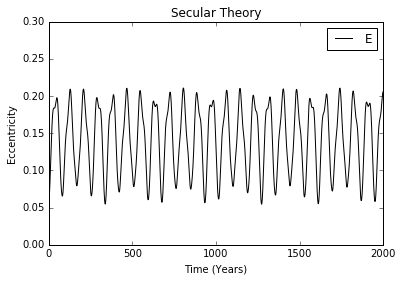

In [148]:
#plt.plot(time,e1t,'k',label='C')
#plt.plot(time,e2t,'k--',label='B')

plt.plot(time,e3t,'k',label='E')
plt.legend()
plt.ylim(0.,0.3)
plt.ylabel('Eccentricity')
plt.xlabel('Time (Years)')
plt.title('Secular Theory')

0.020000200002


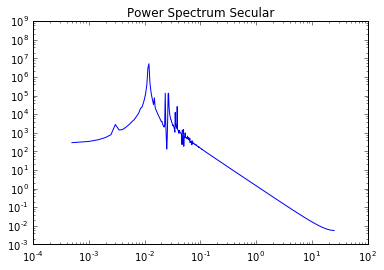

In [151]:
import numpy as np
ps = np.abs(np.fft.fft(e3t))**2

time_step = time[1]
freqs = np.fft.fftfreq(len(e3t), time_step)
#idx = np.argsort(freqs)

#plt.plot(freqs[idx], ps[idx])
plt.loglog(freqs,ps)
plt.title("Power Spectrum Secular")
print time_step

#plt.plot(times[0:500],phi[0:500])

0.010000100001


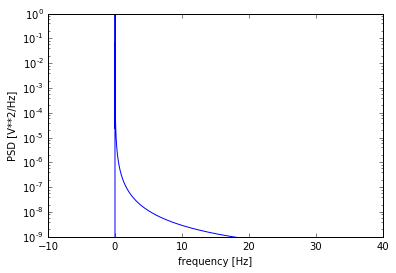

In [139]:
from scipy import signal
f, Pxx_den = signal.periodogram(e3t,1./time[1])
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.ylim(1e-9,1)
plt.xlim(-10,40)
print time[1]